In [32]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from macrosim.SeriesAccessor import SeriesAccessor
import datetime as dt

In [33]:
with open('out.pkl', 'rb') as f:
    df = pickle.load(f)

for col in df.columns[:-1]:
    df[col] = df[col].apply(lambda x: x[0])
df

,LABPART,CPI,M2,output
5,75.742096,180.434934,6050.353667,15095.506030
6,75.712271,181.902929,6104.481667,15160.533602
7,75.692890,182.610306,6179.023333,15236.204912
8,75.649087,183.734942,6261.319333,15314.611605
9,75.625252,185.032625,6318.015333,15379.561298
10,75.545135,183.120129,6410.406000,15398.232679
11,75.545561,184.486846,6488.260000,15493.070048
12,75.546343,185.200104,6562.201000,15572.778564
13,75.548241,186.263432,6651.668333,15672.019688
14,75.550613,187.490301,6738.595333,15770.921674


In [34]:
fred = SeriesAccessor(
    key_path='../fred_key.env',
    key_name='FRED_KEY',
)
start = dt.datetime.fromisoformat('2002-01-01')
end = dt.datetime.fromisoformat('2024-12-31')

act = fred.get_series(
    series_ids=['GDPC1'],
    series_alias=['RGDP'],
    date_range=(start, end)
)

act.reset_index(inplace=True, drop=True)

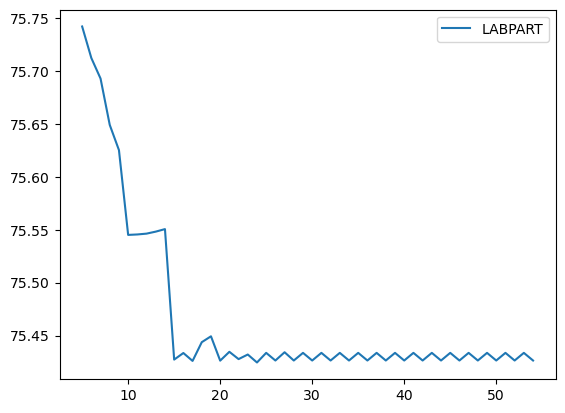

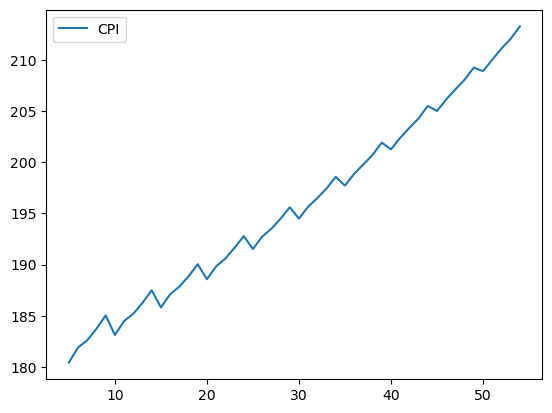

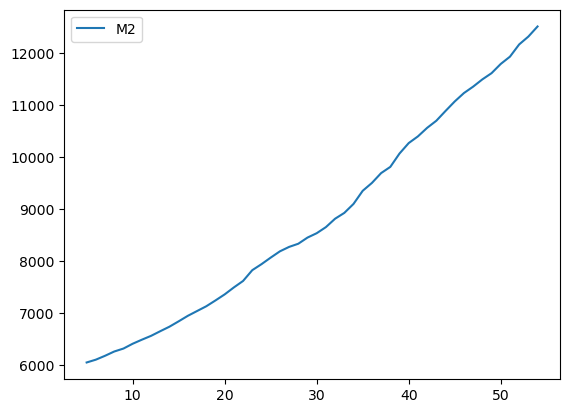

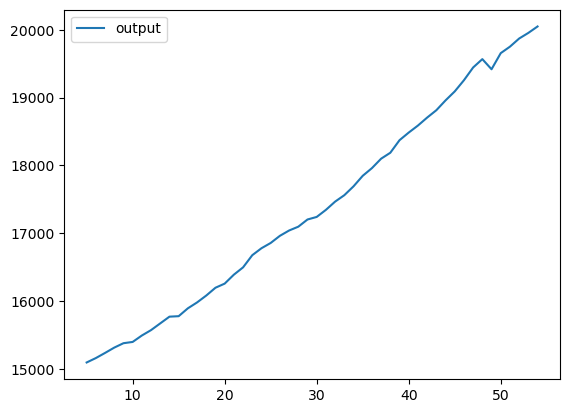

<Figure size 640x480 with 0 Axes>

In [35]:
for col in df.columns:
    plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
plt.clf()

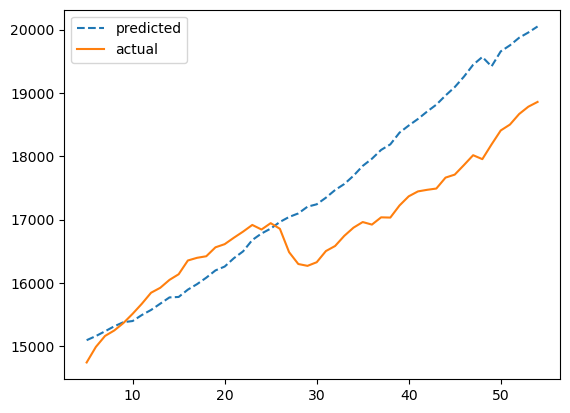

In [36]:
pred = df['output']

plt.plot(pred, label='predicted', linestyle='--')
plt.plot(act.iloc[5:55], label='actual')
plt.legend()

In [37]:
pred

5     15095.506030
6     15160.533602
7     15236.204912
8     15314.611605
9     15379.561298
10    15398.232679
11    15493.070048
12    15572.778564
13    15672.019688
14    15770.921674
15    15777.961154
16    15893.899386
17    15980.670902
18    16082.348860
19    16197.349497
20    16257.973599
21    16390.063919
22    16497.760806
23    16677.168339
24    16779.723686
25    16857.325025
26    16962.571637
27    17040.901997
28    17097.209597
29    17203.274113
30    17240.986077
31    17345.180266
32    17466.699075
33    17561.367690
34    17691.829863
35    17847.094571
36    17960.243655
37    18099.711784
38    18187.269593
39    18372.362973
40    18484.608665
41    18587.973487
42    18705.387909
43    18813.906996
44    18958.845903
45    19091.314498
46    19256.046052
47    19444.222364
48    19567.288743
49    19417.993645
50    19655.603406
51    19751.010122
52    19871.012799
53    19953.855431
54    20048.629028
Name: output, dtype: float64